<a href="https://colab.research.google.com/github/s-im-ran/Machine-Learning/blob/main/10_KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Genre_encoded']=le.fit_transform(df['Genre'])


In [ ]:
df=df.drop('Genre',axis=1)

In [ ]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_encoded
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [ ]:
sc=StandardScaler()
df=sc.fit_transform(df)

In [ ]:
df[4]

array([-1.6541292 , -0.56336851, -1.66266033, -0.39597992, -0.88640526])

In [ ]:
from sklearn.cluster import KMeans
ssd=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=12)
  kmeans.fit(df)
  ssd.append(kmeans.inertia_)

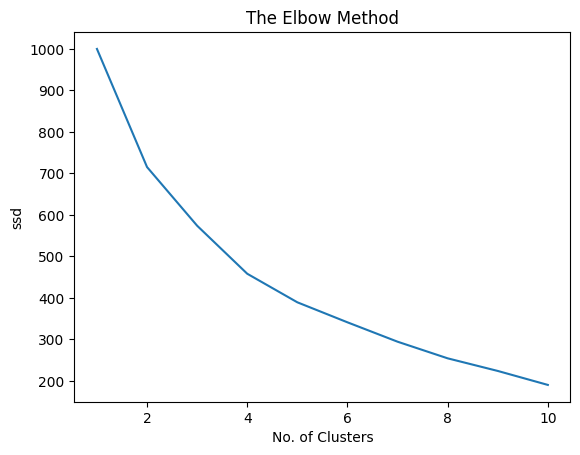

In [ ]:
plt.plot(range(1,11),ssd)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=12)
kmeans.fit(df)
y_pred=kmeans.predict(df)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

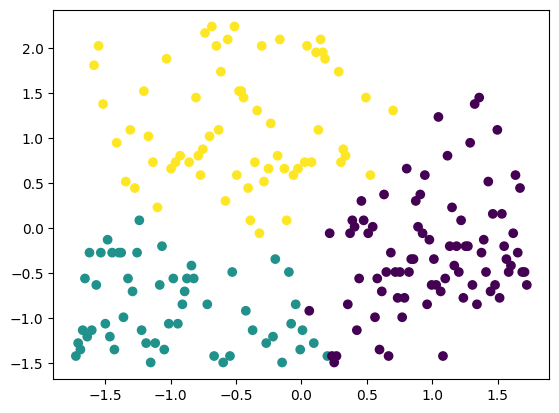

In [ ]:
x1=df[:,0]
x2=df[:,1]
plt.scatter(x1,x2,c=y_pred)

In [ ]:
kmeans=KMeans(n_clusters=4,n_init=10,random_state=12)
kmeans.fit(df)
y_pred=kmeans.predict(df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

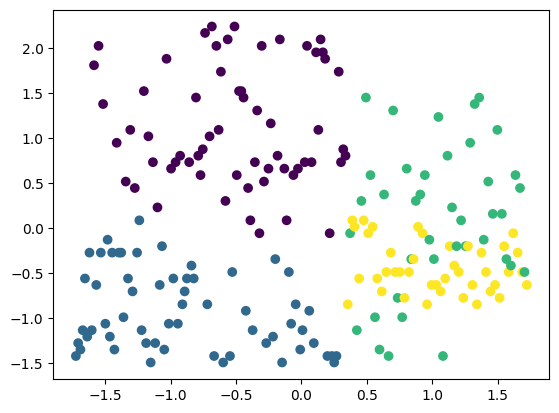

In [ ]:
x1=df[:,0]
x2=df[:,1]

plt.scatter(x1,x2,c=y_pred)

The best value of k is k=3